In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from termcolor import colored, cprint
from collections import Counter

In [3]:
MORENO_RESIDENCE_HALL_FILE = 'networks/moreno_residence_hall.txt'

# Residence-Hall-Network

(Directed)

This directed network contains friendship ratings between 217 residents living at a residence hall located on the Australian National University campus. A node represents a person and 
an edge represents a friendship tie.  The friendships are weighted as follows from strongest to weakest tie:  5 (best friend), 4 (close friend), 3 (friend), 2, 1.

In [4]:
G = nx.read_weighted_edgelist(MORENO_RESIDENCE_HALL_FILE, create_using= nx.DiGraph, nodetype=int)
cprint(nx.info(G),'green')

DiGraph with 217 nodes and 2672 edges


## Degree Centrality 

Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has).

### Degree

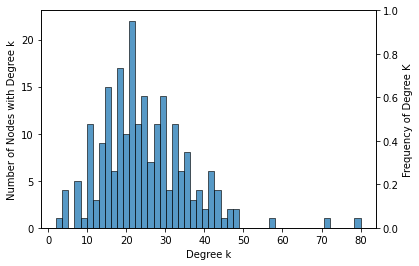

In [5]:
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)

ax = sns.histplot(data=degree_sequence, bins=50)
ax2 = ax.twinx()
ax2.set_ylabel("Frequency of Degree K")
ax.set(xlabel='Degree k', ylabel='Number of Nodes with Degree k')
plt.show()

### In-Degree

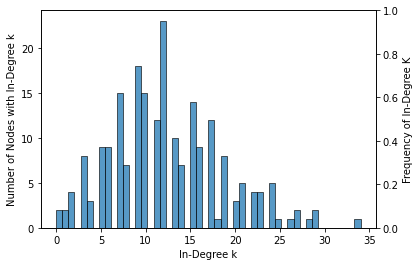

In [6]:
degree_sequence = [G.in_degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)

ax = sns.histplot(data=degree_sequence, bins=50)
ax2 = ax.twinx()
ax2.set_ylabel("Frequency of In-Degree K")
ax.set(xlabel='In-Degree k', ylabel='Number of Nodes with In-Degree k')
plt.show()

### Out-Degree

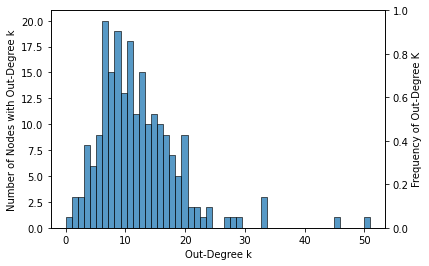

In [7]:
degree_sequence = [G.out_degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)

ax = sns.histplot(data=degree_sequence, bins=50)
ax2 = ax.twinx()
ax2.set_ylabel("Frequency of Out-Degree K")
ax.set(xlabel='Out-Degree k', ylabel='Number of Nodes with Out-Degree k')
plt.show()

## Closeness Centrality 

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.
The closeness centrality is normalized to (n-1)/(|G|-1) where n is the number of nodes in the connected part of graph containing the node. If the graph is not completely connected, this algorithm computes the closeness centrality for each connected part separately scaled by that parts size.
If the ‘distance’ keyword is set to an edge attribute key then the shortest-path length will be computed using Dijkstra’s algorithm with that edge attribute as the edge weight.

In [8]:
def print_closeness(closeness):
    closeness_sequence = list(closeness.values())
    # closeness_sequence
    highest_closeness_node = max(G.nodes, key=closeness.get) #node id with highest closeness
    value_highest_closeness_node = closeness[highest_closeness_node] #value of highest closeness
    cprint('Node with highest closeness:', 'blue', end=' ')
    cprint(highest_closeness_node,'green')
    cprint('Value of highest closeness:', 'blue', end=' ')
    cprint(value_highest_closeness_node,'green')
    cprint('Mean closeness:', 'blue', end=' ')
    cprint(statistics.mean(closeness_sequence),'green')
    cprint('Median closeness:', 'blue', end=' ')
    cprint(statistics.median(closeness_sequence),'green')

### Incoming Closeness Centrality

In [9]:
in_closeness = nx.centrality.closeness_centrality(G)
print_closeness(in_closeness)

Node with highest closeness: 54
Value of highest closeness: 0.4703398453398453
Mean closeness: 0.3617412921665813
Median closeness: 0.3658198797087686


### Outcoming Closeness Centrality

In [10]:
out_closeness = nx.centrality.closeness_centrality(G.reverse())
print_closeness(out_closeness)

Node with highest closeness: 70
Value of highest closeness: 0.500043675751223
Mean closeness: 0.3609448488596979
Median closeness: 0.36180634559474145


## Closeness Distribution

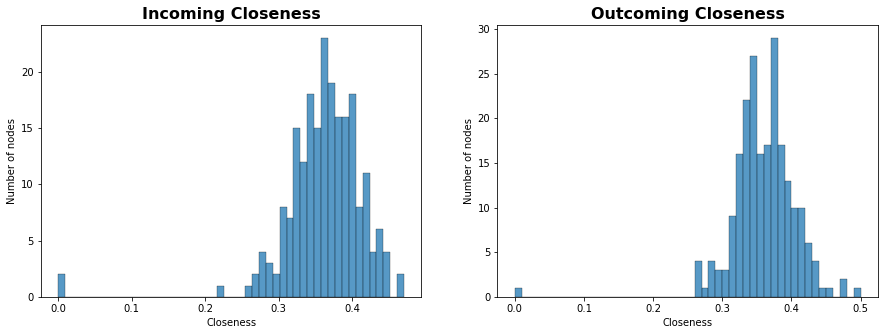

In [11]:
fig_closs, axes = plt.subplots(nrows=1, ncols=2)

#plotting first graph
sns.histplot(data=list(in_closeness.values()), bins=50, ax=axes[0]) #with edge weight
axes[0].set_title("Incoming Closeness",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
axes[0].set_xlabel("Closeness")
axes[0].set_ylabel("Number of nodes")

#plotting second graph
sns.histplot(data=list(out_closeness.values()), bins=50, ax=axes[1]) #with edge weight
axes[1].set_title("Outcoming Closeness",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
axes[1].set_xlabel("Closeness")
axes[1].set_ylabel("Number of nodes")

fig_closs.figure.set_size_inches((15,5))

## Betweenness of nodes

In graph theory, betweenness centrality (or "betweeness centrality") is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.
We ignore the weight in our case because they aren't meaningful.

In [12]:
betweenness_nodes = nx.betweenness_centrality(G) #betweenness of all nodes in the network
highest_betweenness_node = max(G.nodes, key=betweenness_nodes.get) #node id with highest betweenness
value_highest_betweenness_node = betweenness_nodes[highest_betweenness_node] #value of highest node betweenness
betweenness_nodes_sequence = list(betweenness_nodes.values())
cprint('Node with highest betweenness:', 'blue', end=' ') 
cprint(highest_betweenness_node, 'green')
cprint('Value of highest betweenness node:', 'blue', end=' ') 
cprint(value_highest_betweenness_node, 'green')
cprint('Mean betweenness of nodes:', 'blue', end=' ') 
cprint(statistics.mean(betweenness_nodes_sequence), 'green')
cprint('Median betweenness of nodes:', 'blue', end=' ') 
cprint(statistics.median(betweenness_nodes_sequence), 'green')

Node with highest betweenness: 70
Value of highest betweenness node: 0.07422590528432259
Mean betweenness of nodes: 0.008096071636956859
Median betweenness of nodes: 0.005343313329136891


## Betweenness Of Nodes Distribution 

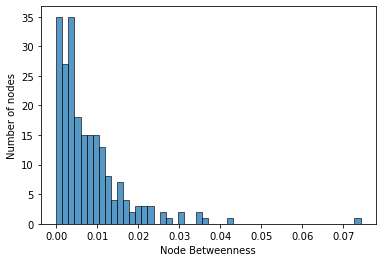

In [13]:
sns.histplot(data=betweenness_nodes_sequence, bins=50)
plt.ylabel("Number of nodes")
plt.xlabel("Node Betweenness")
plt.show()

## Betweenness of edges

Link betweenness: fraction of shortest paths among all possible node pairs that pass 
through the link.
Weights are used to calculate weighted shortest paths, so they are interpreted as distances.

In [14]:
betweenness_edges = nx.centrality.edge_betweenness(G)
highest_betweenness_edge = max(G.edges, key=betweenness_edges.get) #edge id with highest betweenness
value_highest_betweenness_edge = betweenness_edges[highest_betweenness_edge] #value of highest edg betweenness
betweenness_edges_sequence = list(betweenness_edges.values())
cprint('Edge with highest betweenness:', 'blue', end=' ') 
cprint(highest_betweenness_edge, 'green')
cprint('Value of highest betweenness edge:', 'blue', end=' ') 
cprint(value_highest_betweenness_edge, 'green')
cprint('Mean betweenness of edges:', 'blue', end=' ') 
cprint(statistics.mean(betweenness_edges_sequence), 'green')
cprint('Median betweenness of edges:', 'blue', end=' ') 
cprint(statistics.median(betweenness_edges_sequence), 'green')

Edge with highest betweenness: (80, 113)
Value of highest betweenness edge: 0.010137308916223947
Mean betweenness of edges: 0.0010205363722120531
Median betweenness of edges: 0.0007809378830788825


## Betweenness Of Edges Distribution

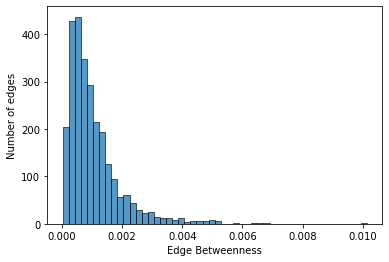

In [15]:
sns.histplot(data=betweenness_edges_sequence, bins=50)
plt.ylabel("Number of edges")
plt.xlabel("Edge Betweenness")
plt.show()

## Assortativity: Correlation

Assortativity is the tendency in networks where nodes connect with other nodes similar to themselves. 
<br>Degree assortativity can be quantified as a Pearson correlation.

*   r = 1:  assortative
*   r = 0:  neutral (non-assortative)
*   r = -1: disassortative

## Assortativity Correlation Coefficient

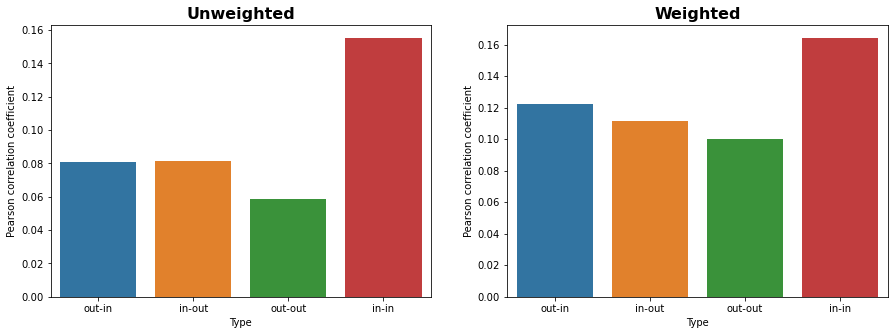

In [16]:
assortativity_data_1 = pd.DataFrame({'Type':'out-in', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='out', y='in')]})
assortativity_data_2 = pd.DataFrame({'Type':'in-out', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='in', y='out')]})
assortativity_data_3 = pd.DataFrame({'Type':'out-out', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='out', y='out')]})
assortativity_data_4 = pd.DataFrame({'Type':'in-in', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='in', y='in')]})

assortativity_data = pd.concat([assortativity_data_1,assortativity_data_2,assortativity_data_3,assortativity_data_4])

w_assortativity_data_1 = pd.DataFrame({'Type':'out-in', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='out', y='in', weight='weight')]})
w_assortativity_data_2 = pd.DataFrame({'Type':'in-out', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='in', y='out', weight='weight')]})
w_assortativity_data_3 = pd.DataFrame({'Type':'out-out', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='out', y='out', weight='weight')]})
w_assortativity_data_4 = pd.DataFrame({'Type':'in-in', 'Pearson correlation coefficient' : [nx.degree_pearson_correlation_coefficient(G, x='in', y='in', weight='weight')]})

w_assortativity_data = pd.concat([w_assortativity_data_1,w_assortativity_data_2,w_assortativity_data_3,w_assortativity_data_4])

#Creating figure area
fig_ass, axes = plt.subplots(nrows=1, ncols=2)

#plotting first graph
sns.barplot(
    data=assortativity_data,
    x='Type', y='Pearson correlation coefficient',
    ax=axes[0]
)
axes[0].set_title('Unweighted',fontdict= { 'fontsize': 16, 'fontweight':'bold'})

#plotting second graph
sns.barplot(
    data=w_assortativity_data,
    x='Type', y='Pearson correlation coefficient',
    ax=axes[1]
)
axes[1].set_title('Weighted',fontdict= { 'fontsize': 16, 'fontweight':'bold'})


fig_ass.figure.set_size_inches((15,5))


In [17]:
asso_test=nx.degree_pearson_correlation_coefficient(G)
if(round(asso_test,1)>=0.1): cprint('Assortative network', 'yellow')
if(round(asso_test,1)==0): cprint('Neutral network', 'yellow')
if(round(asso_test,1)<0): cprint('Disassortative network', 'yellow')


Assortative network


In [18]:
asso_test=nx.degree_pearson_correlation_coefficient(G, weight='weight')
if(round(asso_test,1)>=0.1): cprint('Assortative network', 'yellow')
if(round(asso_test,1)==0): cprint('Neutral network', 'yellow')
if(round(asso_test,1)<0): cprint('Disassortative network', 'yellow')

Assortative network


## Degree Correlation - Assortativity/Neutral/Disassortativity
The average degree connectivity is the average nearest neighbor degree of nodes with degree k.

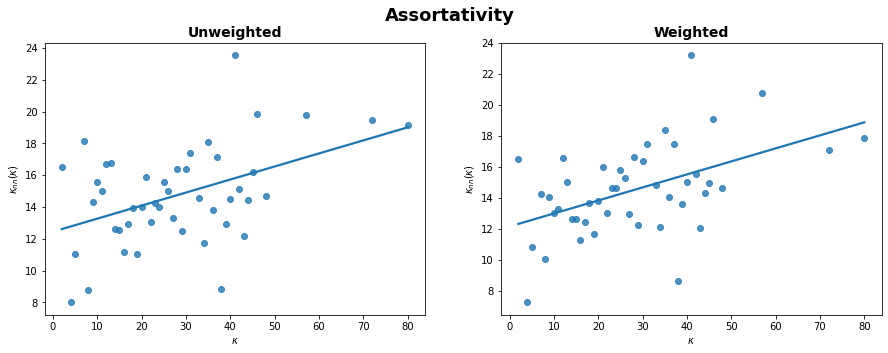

In [23]:
avg_weighted_degree_connectivity = nx.average_degree_connectivity(G,weight='weight')
avg_degree_connectivity = nx.average_degree_connectivity(G)

#Creating figure area
fig_knearest, axes = plt.subplots(nrows=1, ncols=2)

sns.regplot(x=list(avg_degree_connectivity.keys()), y=list(avg_degree_connectivity.values()),
    ax=axes[0], ci=None)
axes[0].set_title('Unweighted',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
axes[0].set_xlabel("$\kappa$")
axes[0].set_ylabel("$\kappa_{nn}(\kappa)$")


# for weighted version see https://www.pnas.org/content/101/11/3747 Section "Structural Organization of Weighted Networks"

sns.regplot(x=list(avg_weighted_degree_connectivity.keys()), y=list(avg_weighted_degree_connectivity.values()),
    ax=axes[1], ci=None)
axes[1].set_title('Weighted',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
axes[1].set_xlabel("$\kappa$")
axes[1].set_ylabel("$\kappa_{nn}(\kappa)$")


fig_knearest.suptitle('Assortativity',fontsize=18, fontweight='bold')

fig_knearest.figure.set_size_inches((15,5))